In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import export_graphviz
import graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [ ]:
# Reading training and testing data
train_df = pd.read_csv('/content/train.csv',sep=';')

val_df = pd.read_csv('/content/test.csv',sep=';')

print(train_df.shape)
train_df.head()

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# Looking at the datatypes of the columns to see if Conversion to Numerical / Encoding is needed or not
train_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [ ]:
train_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

EDA

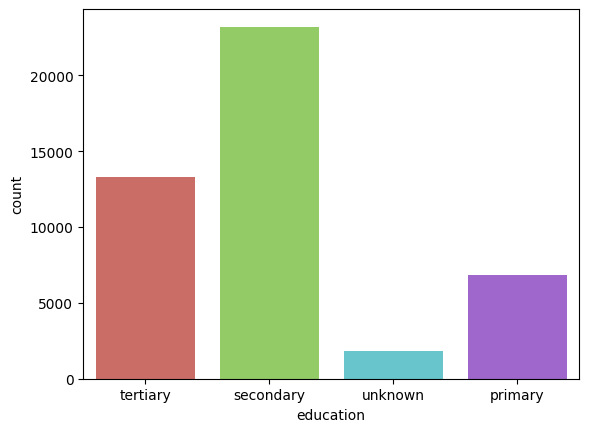

In [ ]:
train_df.education.value_counts(dropna=False)
sns.countplot(x="education", data=train_df, palette="hls")
plt.show()

<ipython-input-417-0b8d0f498de1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


<Axes: >

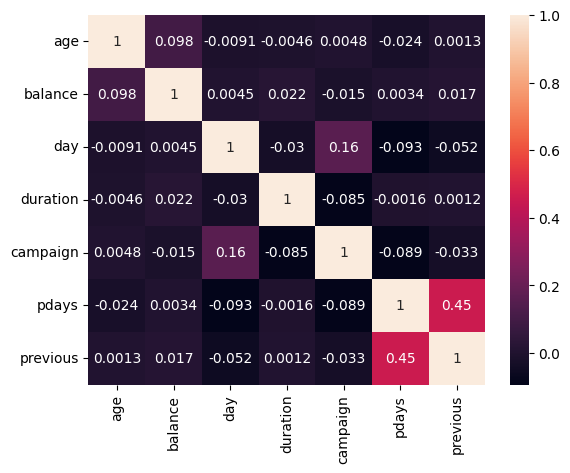

In [ ]:
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot =True)

<Axes: >

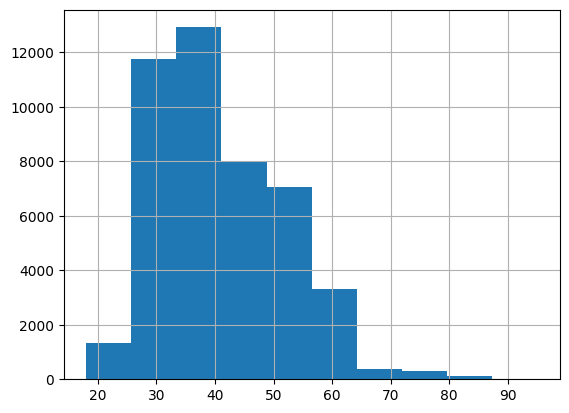

In [ ]:
train_df["age"].hist()

The histogram shows that most of our clients are between the ages of 25 and 50.

# **Preparing the Training and Testing Dataset.**

In [ ]:
# Removing the Target Feature 'y' from the dataset to model
train_x = train_df.iloc[:, :-1]
train_target = train_df.y

# Testing Dataset
val_x = val_df.iloc[:, :-1]
val_target = val_df.y

train_x.head()
train_x.shape

(45211, 16)

In [ ]:
train_target.head(7)

0    no
1    no
2    no
3    no
4    no
5    no
6    no
Name: y, dtype: object

In [ ]:
# Looking at the datatypes of the columns to see if Conversion to Numerical / Encoding is needed or not
train_x.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

# **PERFORMING LABEL ENCODING AND ONE HOT ENCODING ON BOTH DATASETS**

In [ ]:
encoding_columns = list(train_x.select_dtypes(include=object))
# encoding_columns
encoding_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [ ]:
# The Education Feature shows Ordinal Data so we will perform label encoding on it.
print(train_x['education'].unique())
# The values show a hierarchy

['tertiary' 'secondary' 'unknown' 'primary']


In [ ]:
# Performing Label Encoding
edu = {'unknown': 0,
       'primary': 1,
       'secondary': 2,
       'tertiary': 3}

# On Training Dataset
train_x['education'] = train_x['education'].replace(edu)
# On Testing Dataset
val_x['education'] = val_x['education'].replace(edu)

print(train_x['education'].value_counts())

2    23202
3    13301
1     6851
0     1857
Name: education, dtype: int64


In [ ]:
# We will perform One Hot Encoding for the rest of the columns as they show Nominal data
# Selecting columns for One Hot Encoding
ohe_cols = list(train_x.select_dtypes(include=object))
# Performing One Hot on columns
train_x = pd.get_dummies(train_x ,columns = ohe_cols ,prefix=ohe_cols)
val_x = pd.get_dummies(val_x ,columns = ohe_cols ,prefix=ohe_cols)
# Here by choice i haven't passed the argument drop_first which drops the first encoded columns which helps with multicolinearity between columns.
# And yes i tried using it , it gave the same results. It can help with iterpretibility tho.

train_x.head()

,age,education,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,3,2143,5,261,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,2,29,5,151,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,2,5,76,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,5,92,1,-1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,0,1,5,198,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


# **Training the Model**

In [ ]:
accuracy_l=[]
precision_l=[]
recall_l=[]

1. Logistic Regression

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(train_x,train_target)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
val_prediction = lr_model.predict(val_x)
accuracy = accuracy_score(val_target, val_prediction)
print("Accuracy is: ", accuracy)
precision = precision_score(val_target, val_prediction,pos_label='yes')
print("Precision Score: ", precision)
recall = recall_score(val_target, val_prediction,pos_label='yes')
print("Recall Score: ", recall)
accuracy_l.append(accuracy)
precision_l.append(precision)
recall_l.append(recall)

Accuracy is:  0.8911745189117452
Precision Score:  0.5810055865921788
Recall Score:  0.19961612284069097


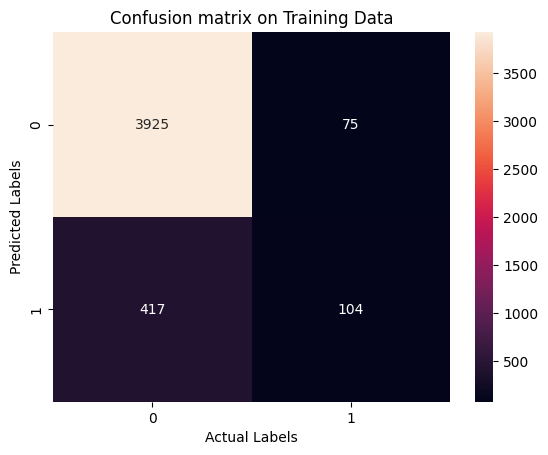

In [ ]:
plt.title("Confusion matrix on Training Data")
sns.heatmap(confusion_matrix(val_target, val_prediction), annot=True, fmt='d')
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.show()

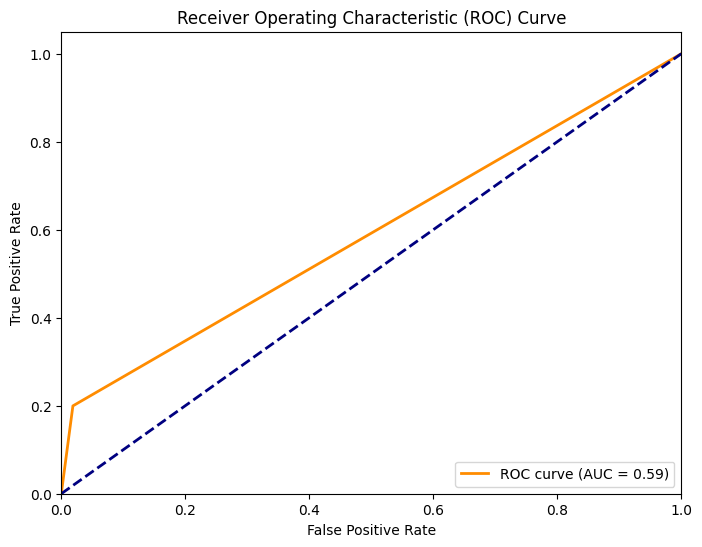

In [ ]:
val_target_forROC = [1 if label == 'yes' else 0 for label in val_target]
# Convert string predictions to numeric probabilities in val_prediction
val_prediction_forROC = [1 if label == 'yes' else 0 for label in val_prediction]
fpr, tpr, thresholds = roc_curve(val_target_forROC,val_prediction_forROC)
# Calculate AUC (Area Under the ROC Curve)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

2.KNN Classifier

In [ ]:
KNN_classifier=KNeighborsClassifier()
KNN_classifier.fit(train_x,train_target)

KNeighborsClassifier()

In [ ]:
KNN_classifier.fit(train_x,train_target)

KNeighborsClassifier()

In [ ]:
val_prediction = KNN_classifier.predict(val_x)
accuracy = accuracy_score(val_target, val_prediction)
print("Accuracy is: ", accuracy)
precision = precision_score(val_target, val_prediction,pos_label='yes')
print("Precision Score: ", precision)
recall = recall_score(val_target, val_prediction,pos_label='yes')
print("Recall Score: ", recall)
accuracy_l.append(accuracy)
precision_l.append(precision)
recall_l.append(recall)

Accuracy is:  0.9124087591240876
Precision Score:  0.691131498470948
Recall Score:  0.43378119001919385


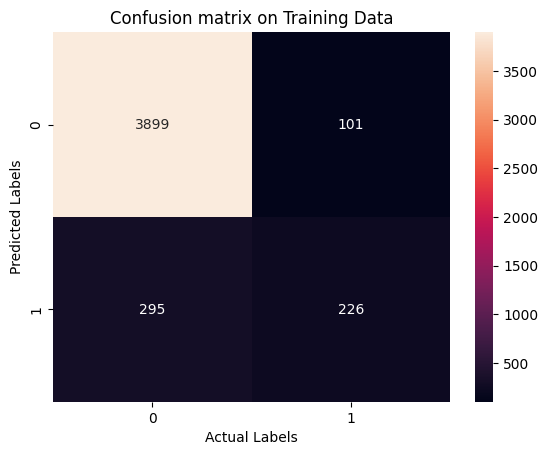

In [ ]:
plt.title("Confusion matrix on Training Data")
sns.heatmap(confusion_matrix(val_target, val_prediction), annot=True, fmt='d')
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.show()

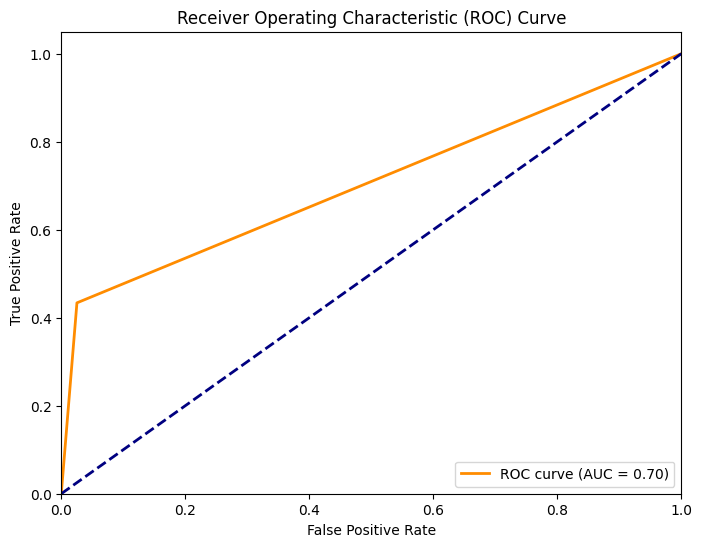

In [ ]:
val_target_forROC = [1 if label == 'yes' else 0 for label in val_target]
# Convert string predictions to numeric probabilities in val_prediction
val_prediction_forROC = [1 if label == 'yes' else 0 for label in val_prediction]
fpr, tpr, thresholds = roc_curve(val_target_forROC,val_prediction_forROC)
# Calculate AUC (Area Under the ROC Curve)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

3.Support Vector Machine

In [ ]:
SVC_Classifier=SVC(kernel = 'sigmoid',random_state = 0)
SVC_Classifier.fit(train_x,train_target)

SVC(kernel='sigmoid', random_state=0)

In [ ]:
SVC_Classifier.fit(train_x,train_target)

SVC(kernel='sigmoid', random_state=0)

In [ ]:
val_prediction = SVC_Classifier.predict(val_x)
accuracy = accuracy_score(val_target, val_prediction)
print("Accuracy is: ", accuracy)
precision = precision_score(val_target, val_prediction,pos_label='yes')
print("Precision Score: ", precision)
recall = recall_score(val_target, val_prediction,pos_label='yes')
print("Recall Score: ", recall)
accuracy_l.append(accuracy)
precision_l.append(precision)
recall_l.append(recall)

Accuracy is:  0.8223844282238443
Precision Score:  0.22568093385214008
Recall Score:  0.22264875239923224


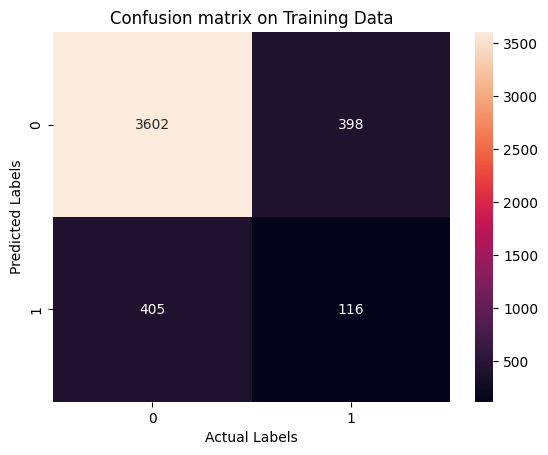

In [ ]:
plt.title("Confusion matrix on Training Data")
sns.heatmap(confusion_matrix(val_target, val_prediction), annot=True, fmt='d')
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.show()

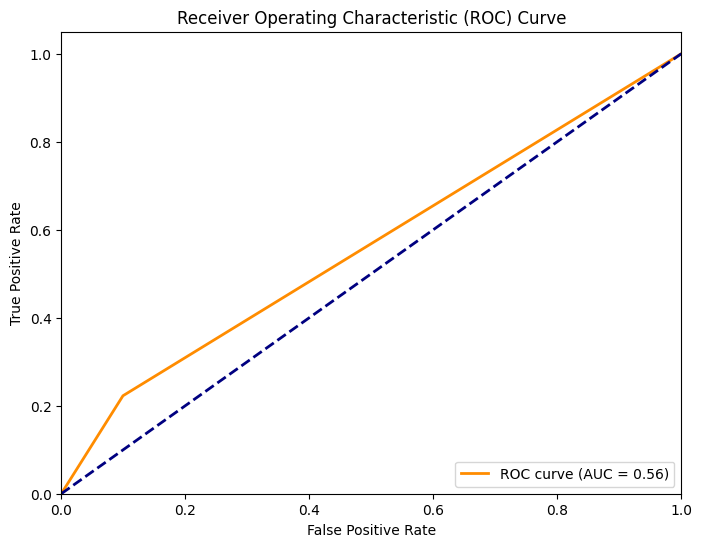

In [ ]:
val_target_forROC = [1 if label == 'yes' else 0 for label in val_target]
# Convert string predictions to numeric probabilities in val_prediction
val_prediction_forROC = [1 if label == 'yes' else 0 for label in val_prediction]
fpr, tpr, thresholds = roc_curve(val_target_forROC,val_prediction_forROC)
# Calculate AUC (Area Under the ROC Curve)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

4.Navie Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
GaussianNB_Classifier = GaussianNB()
GaussianNB_Classifier.fit(train_x,train_target)

GaussianNB()

In [ ]:
GaussianNB_Classifier.fit(train_x,train_target)

GaussianNB()

In [ ]:
val_prediction = GaussianNB_Classifier.predict(val_x)
accuracy = accuracy_score(val_target, val_prediction)
print("Accuracy is: ", accuracy)
precision = precision_score(val_target, val_prediction,pos_label='yes')
print("Precision Score: ", precision)
recall = recall_score(val_target, val_prediction,pos_label='yes')
print("Recall Score: ", recall)
accuracy_l.append(accuracy)
precision_l.append(precision)
recall_l.append(recall)

Accuracy is:  0.8469365184693651
Precision Score:  0.37872340425531914
Recall Score:  0.5124760076775432


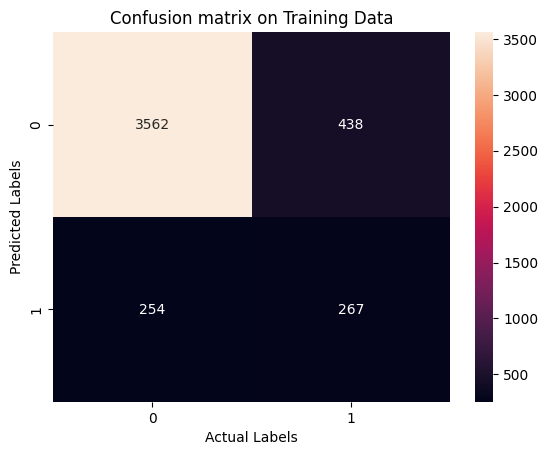

In [ ]:
plt.title("Confusion matrix on Training Data")
sns.heatmap(confusion_matrix(val_target, val_prediction), annot=True, fmt='d')
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.show()

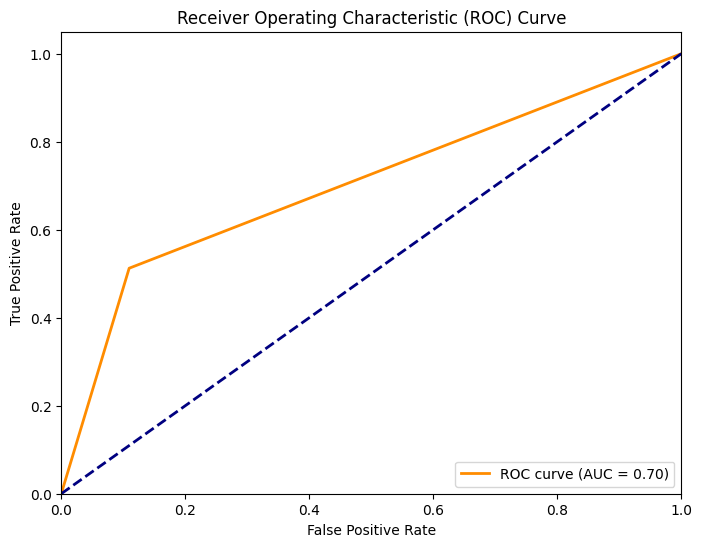

In [ ]:
val_target_forROC = [1 if label == 'yes' else 0 for label in val_target]
# Convert string predictions to numeric probabilities in val_prediction
val_prediction_forROC = [1 if label == 'yes' else 0 for label in val_prediction]
fpr, tpr, thresholds = roc_curve(val_target_forROC,val_prediction_forROC)
# Calculate AUC (Area Under the ROC Curve)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

5.Random Forest

In [ ]:
term_model = RandomForestClassifier(random_state=51)

In [ ]:
term_model.fit(train_x,train_target)

RandomForestClassifier(random_state=51)

In [ ]:
val_prediction = term_model.predict(val_x)

In [ ]:
accuracy = accuracy_score(val_target, val_prediction)
print("Accuracy is: ", accuracy)
precision = precision_score(val_target, val_prediction,pos_label='yes')
print("Precision Score: ", precision)
recall = recall_score(val_target, val_prediction,pos_label='yes')
print("Recall Score: ", recall)
accuracy_l.append(accuracy)
precision_l.append(precision)
recall_l.append(recall)

Accuracy is:  1.0
Precision Score:  1.0
Recall Score:  1.0


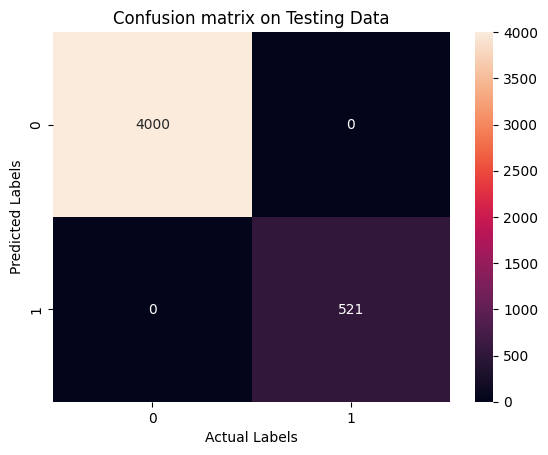

In [ ]:
plt.title("Confusion matrix on Testing Data")
sns.heatmap(confusion_matrix(val_prediction, val_target), annot=True, fmt='d')
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.show()

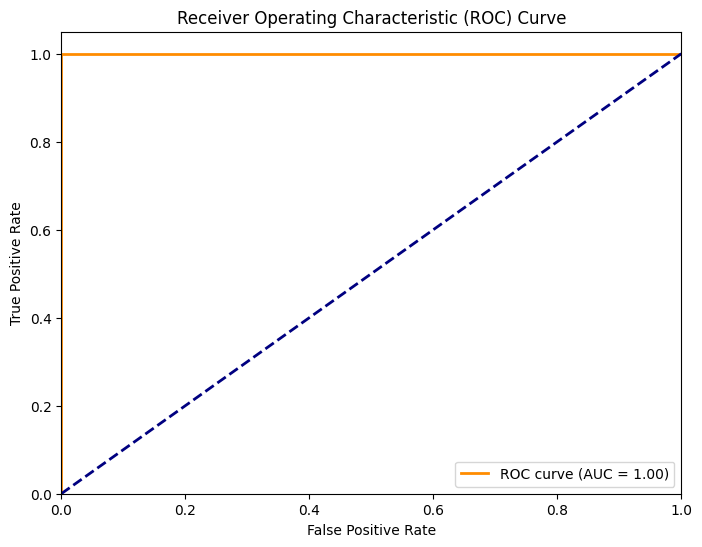

In [ ]:
val_target_forROC = [1 if label == 'yes' else 0 for label in val_target]
# Convert string predictions to numeric probabilities in val_prediction
val_prediction_forROC = [1 if label == 'yes' else 0 for label in val_prediction]
fpr, tpr, thresholds = roc_curve(val_target_forROC,val_prediction_forROC)
# Calculate AUC (Area Under the ROC Curve)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

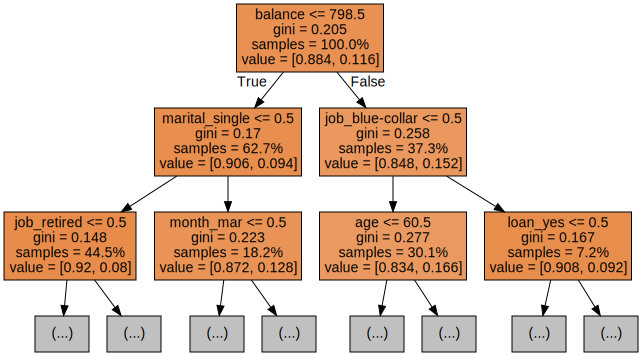

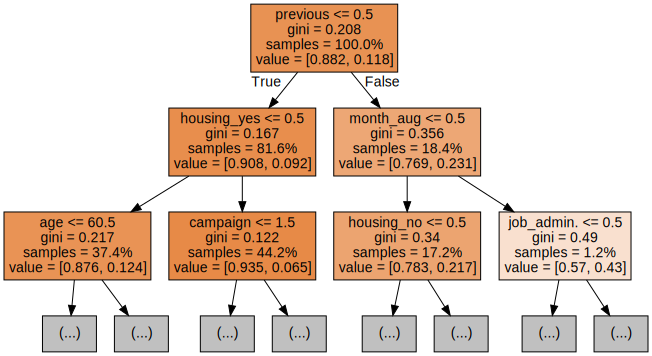

In [ ]:
# RandomForest creates n number of descision trees and the final prediction is concluded considering all the predictions from them.
# Here is the visualization of few of those descision trees.
for i in range(2):
    tree = term_model.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=train_x.columns,
                               filled=True,
                               max_depth=2,
                               impurity=True,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [ ]:
algorithm_names = ['Logistic Regression', 'KNN', 'SVM', 'Naive Bayes','Random Forest']
data = {'Algorithm Name':algorithm_names,'Accuracy': accuracy_l, 'Precision': precision_l,'Recall':recall_l}

# Create a DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
print(df)

        Algorithm Name  Accuracy  Precision    Recall
0  Logistic Regression  0.891175   0.581006  0.199616
1                  KNN  0.912409   0.691131  0.433781
2                  SVM  0.822384   0.225681  0.222649
3          Naive Bayes  0.846937   0.378723  0.512476
4        Random Forest  1.000000   1.000000  1.000000


In [ ]:
from tabulate import tabulate
print(tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False))

╒═════════════════════╤════════════╤═════════════╤══════════╕
│ Algorithm Name      │   Accuracy │   Precision │   Recall │
╞═════════════════════╪════════════╪═════════════╪══════════╡
│ Logistic Regression │   0.891175 │    0.581006 │ 0.199616 │
├─────────────────────┼────────────┼─────────────┼──────────┤
│ KNN                 │   0.912409 │    0.691131 │ 0.433781 │
├─────────────────────┼────────────┼─────────────┼──────────┤
│ SVM                 │   0.822384 │    0.225681 │ 0.222649 │
├─────────────────────┼────────────┼─────────────┼──────────┤
│ Naive Bayes         │   0.846937 │    0.378723 │ 0.512476 │
├─────────────────────┼────────────┼─────────────┼──────────┤
│ Random Forest       │   1        │    1        │ 1        │
╘═════════════════════╧════════════╧═════════════╧══════════╛


<Figure size 1000x600 with 0 Axes>

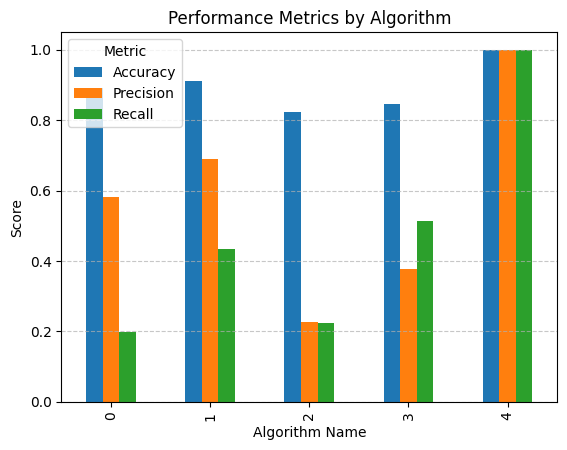

In [ ]:
#df.set_index('Algorithm Name', inplace=True)

# Plot Accuracy, Precision, and Recall for each algorithm
plt.figure(figsize=(10, 6))
df.plot(kind='bar', stacked=False)
plt.title('Performance Metrics by Algorithm')
plt.ylabel('Score')
plt.xlabel('Algorithm Name')
plt.legend(title='Metric')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

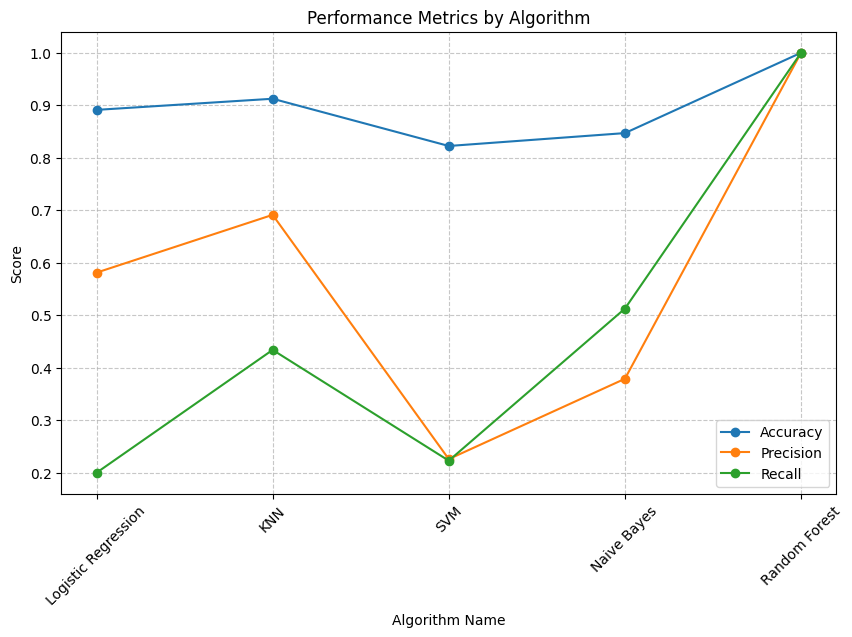

In [ ]:
#df.set_index('Algorithm Name', inplace=True)
# Create a line plot for Accuracy, Precision, and Recall
plt.figure(figsize=(10, 6))
plt.plot(df['Algorithm Name'], df['Accuracy'], marker='o', label='Accuracy')
plt.plot(df['Algorithm Name'], df['Precision'], marker='o', label='Precision')
plt.plot(df['Algorithm Name'], df['Recall'], marker='o', label='Recall')
plt.title('Performance Metrics by Algorithm')
plt.xlabel('Algorithm Name')
plt.ylabel('Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend()  # Add a legend to the plot
plt.show()